In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("C:\\Users\\Priyesh\\Downloads\\archive (4)\\Adsense.csv", header=0)

In [3]:
df.head()

,Month,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR)
0,2018-06-20 - 2018-06-30,472,499,31,237.48,224.63,69.96%,112.09
1,2018-07-01 - 2018-07-31,226,595,11,306.66,116.48,74.39%,69.30
2,2018-08-01 - 2018-08-31,293,1201,2,46.81,11.42,76.02%,13.72
3,2018-09-01 - 2018-09-30,316,1283,1,126.09,31.06,73.72%,39.85
4,2018-10-01 - 2018-10-31,260,972,0,63.15,16.89,58.51%,16.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     21 non-null     object 
 1   Page views                21 non-null     int64  
 2   Impressions               21 non-null     int64  
 3   Clicks                    21 non-null     int64  
 4   Page RPM (INR)            21 non-null     float64
 5   Impression RPM (INR)      21 non-null     float64
 6   Active View Viewable      21 non-null     object 
 7   Estimated earnings (INR)  21 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ KB


In [5]:
df.isnull().sum()

Month                       0
Page views                  0
Impressions                 0
Clicks                      0
Page RPM (INR)              0
Impression RPM (INR)        0
Active View Viewable        0
Estimated earnings (INR)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include='all')

,Month,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR)
count,21,21.000000,21.000000,21.000000,21.000000,21.000000,21,21.000000
unique,21,NaN,NaN,NaN,NaN,NaN,17,NaN
top,2018-06-20 - 2018-06-30,NaN,NaN,NaN,NaN,NaN,100.00%,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,5,NaN
mean,NaN,334.761905,799.952381,3.952381,93.395238,40.405238,NaN,26.859524
std,NaN,223.153961,494.686919,6.895478,80.787799,50.888343,NaN,27.526495
min,NaN,33.000000,46.000000,0.000000,3.590000,2.510000,NaN,0.250000
25%,NaN,160.000000,499.000000,0.000000,36.890000,11.420000,NaN,12.440000
50%,NaN,316.000000,639.000000,1.000000,63.150000,23.520000,NaN,16.420000
75%,NaN,472.000000,1003.000000,5.000000,133.940000,45.460000,NaN,39.850000


Text(0, 0.5, 'Estimated earnings (INR)')

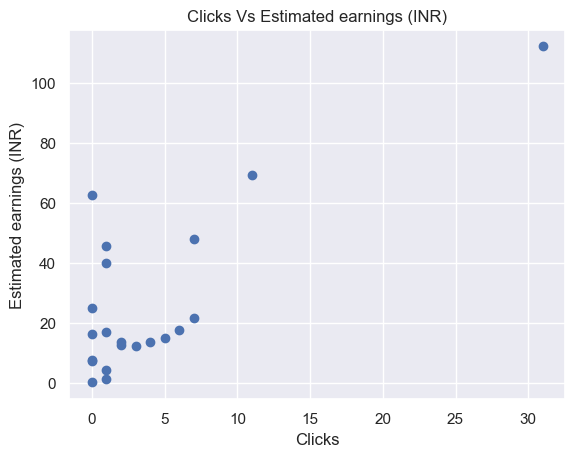

In [8]:
plt.scatter(df['Clicks'],df['Estimated earnings (INR)'])
plt.title('Clicks Vs Estimated earnings (INR)')
plt.xlabel('Clicks')
plt.ylabel('Estimated earnings (INR)')

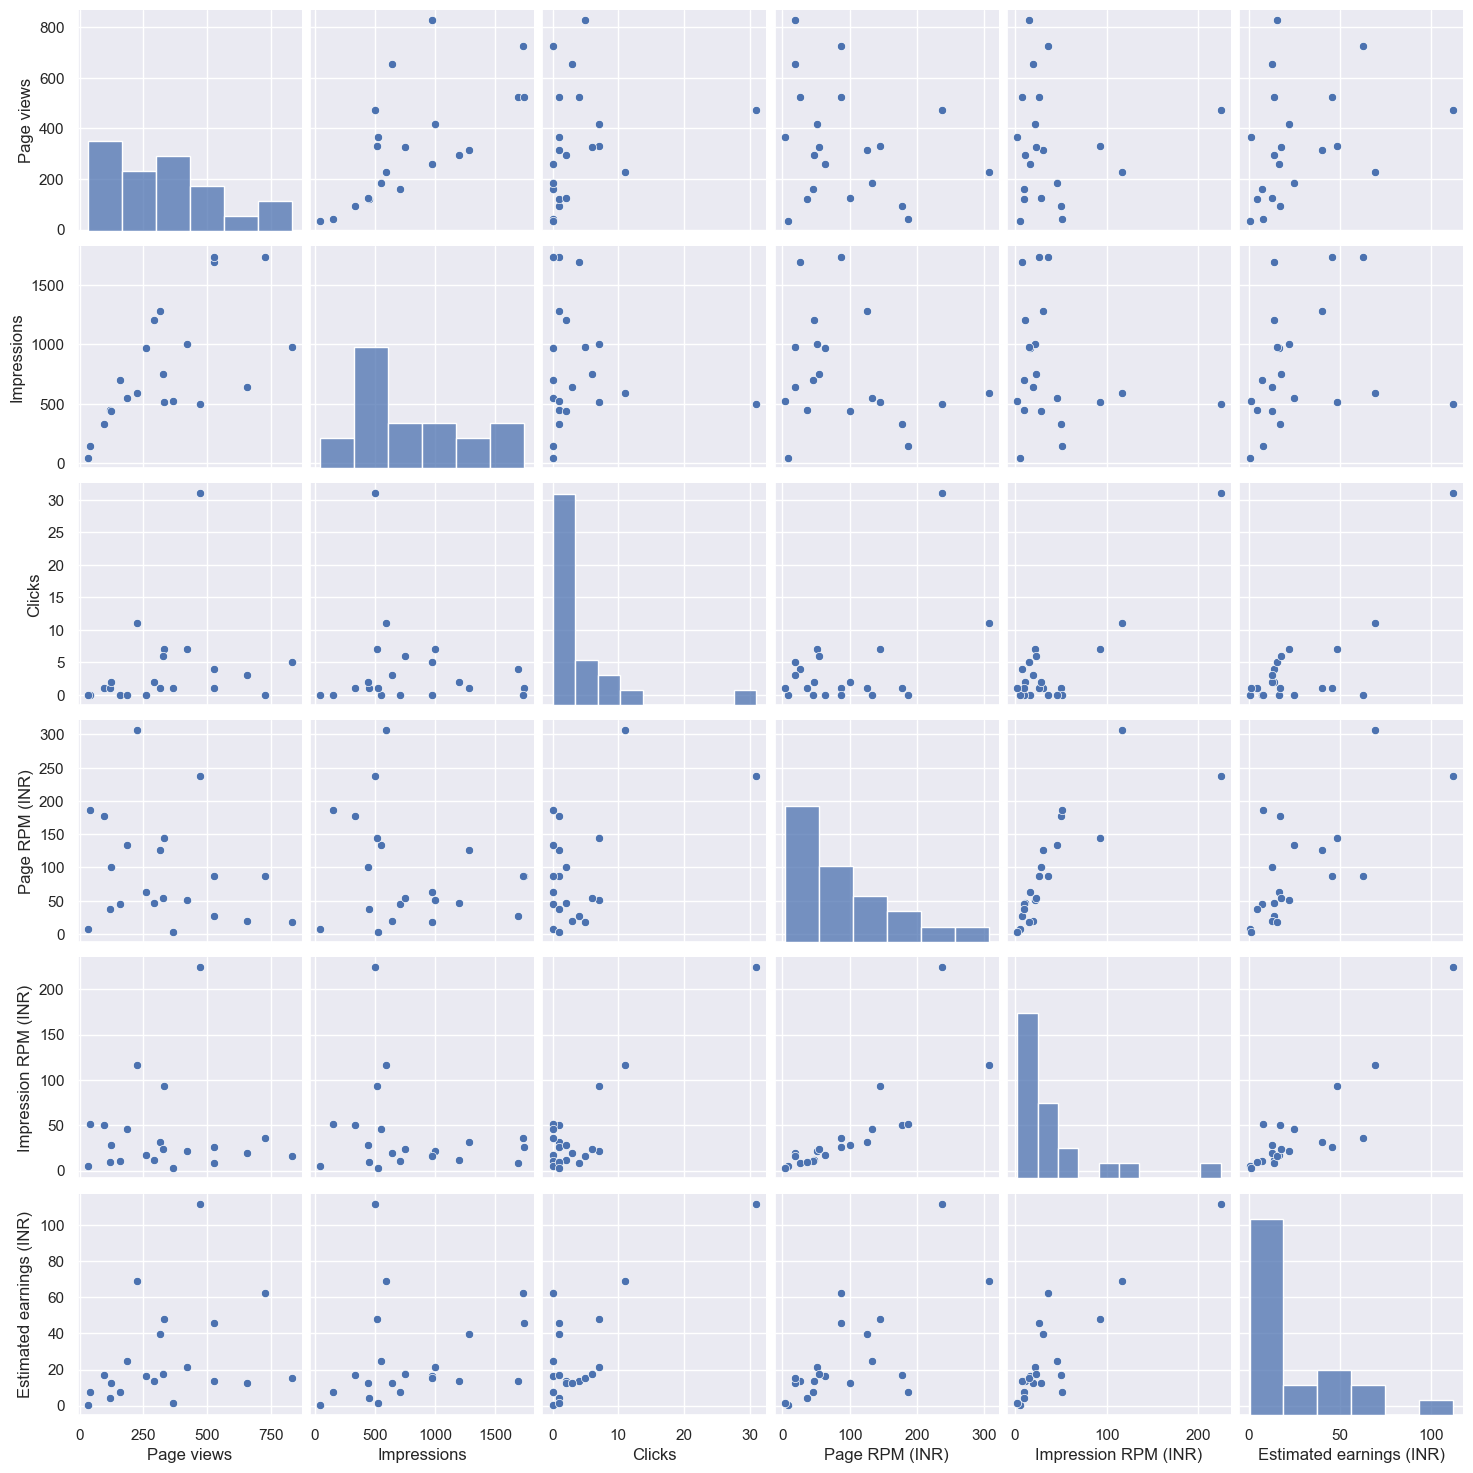

In [9]:
df.fillna(df.mean(), inplace=True)
sns.pairplot(df)

In [10]:
X=df.drop(['Month','Active View Viewable','Estimated earnings (INR)'],axis=1)
Y=df['Estimated earnings (INR)']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#Fit the model using training data set
lm.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_pred=lm.predict(X_test)
# print the coefficients
print(lm.intercept_)
print(lm.coef_)

-11.930010590790882
[ 0.00865475  0.01716164 -0.14235781  0.00697464  0.5171086 ]


In [24]:
Predicted=np.array([y_pred])
Predicted=y_pred.reshape(-1, 1)
print(Predicted)

[[19.44308915]
 [ 2.07778845]
 [29.62174719]
 [19.49454722]
 [14.46500601]
 [43.38878729]
 [47.86578429]
 [16.17575514]
 [17.16411298]]


In [28]:
Y_test

15    21.66
10     4.46
3     39.85
18    15.20
17    12.44
14    62.65
16    48.10
4     16.42
2     13.72
Name: Estimated earnings (INR), dtype: float64

In [32]:
Actual=np.array([Y_test])
Actual=Actual.reshape(-1, 1)
print(Actual)

[[21.66]
 [ 4.46]
 [39.85]
 [15.2 ]
 [12.44]
 [62.65]
 [48.1 ]
 [16.42]
 [13.72]]


In [33]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual Sales"]=Actual
new_df["Predicted Sales"]=Predicted
new_df=new_df.reset_index().drop("index", axis=1)

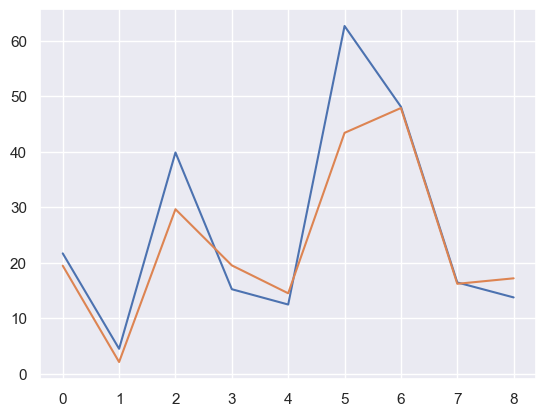

In [34]:
new_df['Actual Sales'].plot()
new_df['Predicted Sales'].plot()
plt.show()

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean Absolute Error",(Y_test,y_pred))
print("R2 Score",r2_score(Y_test,y_pred))


print("=======================================")

output_df=pd.DataFrame({'Actual Output':Y_test,'Predicted Output':y_pred})
output_df

Mean Absolute Error (15    21.66
10     4.46
3     39.85
18    15.20
17    12.44
14    62.65
16    48.10
4     16.42
2     13.72
Name: Estimated earnings (INR), dtype: float64, array([19.44308915,  2.07778845, 29.62174719, 19.49454722, 14.46500601,
       43.38878729, 47.86578429, 16.17575514, 17.16411298]))
R2 Score 0.8292337877496814


,Actual Output,Predicted Output
15,21.66,19.443089
10,4.46,2.077788
3,39.85,29.621747
18,15.20,19.494547
17,12.44,14.465006
14,62.65,43.388787
16,48.10,47.865784
4,16.42,16.175755
2,13.72,17.164113


In [38]:
from sklearn.linear_model import Ridge
rm= Ridge()
rm.fit(X_train, Y_train)
print(rm.intercept_)
print(rm.coef_)

-11.924933775622609
[ 0.00862525  0.01715907 -0.13569721  0.00725381  0.51591092]


In [39]:
Y_pred=rm.predict(X_test)
Y_predict_trian= lm.predict(X_train)


In [40]:
Y_pred

array([19.46840642,  2.08319225, 29.61885495, 19.49240975, 14.45112611,
       43.34885599, 47.83558511, 16.16805642, 17.17016125])

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squred: ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred:  0.8287589638516408
RMSE: 7.6170072836177445
Adj R-square: 0.7716786184688544


Getting a lower R-Square Value by Putting Ridge Model

In [44]:
from sklearn.linear_model import Lasso
# create a model object
Lasso= Lasso()
# train the model object
Lasso.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

-11.930010590790882
[ 0.00865475  0.01716164 -0.14235781  0.00697464  0.5171086 ]


In [45]:
Y_predict_lasso= Lasso.predict(X_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_predict_lasso)
print("R-squred: ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_predict_lasso))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred:  0.8183049690604725
RMSE: 7.846066279269959
Adj R-square: 0.7577399587472966


Value has decreased a bit more Lasso prediction model. That means Values Predicted via
Linear Regression Model Prdovides the most Optimum Output.